In [1]:
import sys
import anndata
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns 
import scipy
import matplotlib.pyplot as plt

In [2]:
full_fn = anndata.read('can_reproducibility/lung_models/lung_annotation/annotation/query_and_reference_final.h5ad')

In [3]:
query = full_fn[full_fn.obs['_dataset']=='query'].copy()
query

AnnData object with n_obs × n_vars = 69650 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'paper_annotation', 'sample', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'popv_rf_prediction', 'popv_rf_prediction_probabilities'

In [4]:
query.obsm['UMAP BBKNN'] = query.obsm['X_bbknn_umap_popv']
query.obsm['Uncorrected'] = query.obsm['X_pca']
query.obsm['Scanorama'] = query.obsm['X_scanorama']
query.obsm['scANVI'] = query.obsm['X_scanvi']
query.obsm['scVI'] = query.obsm['X_scvi']

/home/cane/miniconda3/envs/popv_new/lib/python3.8/site-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
Computing neighbors:   0%|          | 0/5 [00:00<?, ?it/s]2023-02-28 22:39:31.466208: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
2023-02-28 22:39:31.877242: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such f

INFO     mesothelial cell consists of a single batch or is too small. Skip.                                        
INFO     serous cell of epithelium of bronchus consists of a single batch or is too small. Skip.                   


Embeddings:  20%|██        | 1/5 [06:50<27:21, 410.46s/it]

INFO     mesothelial cell consists of a single batch or is too small. Skip.                                        
INFO     serous cell of epithelium of bronchus consists of a single batch or is too small. Skip.                   


Embeddings:  40%|████      | 2/5 [08:00<10:31, 210.48s/it]

INFO     mesothelial cell consists of a single batch or is too small. Skip.                                        
INFO     serous cell of epithelium of bronchus consists of a single batch or is too small. Skip.                   


Embeddings:  60%|██████    | 3/5 [14:30<09:44, 292.39s/it]

INFO     mesothelial cell consists of a single batch or is too small. Skip.                                        
INFO     serous cell of epithelium of bronchus consists of a single batch or is too small. Skip.                   


Embeddings:  80%|████████  | 4/5 [15:39<03:24, 204.10s/it]

INFO     mesothelial cell consists of a single batch or is too small. Skip.                                        
INFO     serous cell of epithelium of bronchus consists of a single batch or is too small. Skip.                   


Embeddings: 100%|██████████| 5/5 [16:48<00:00, 201.79s/it]


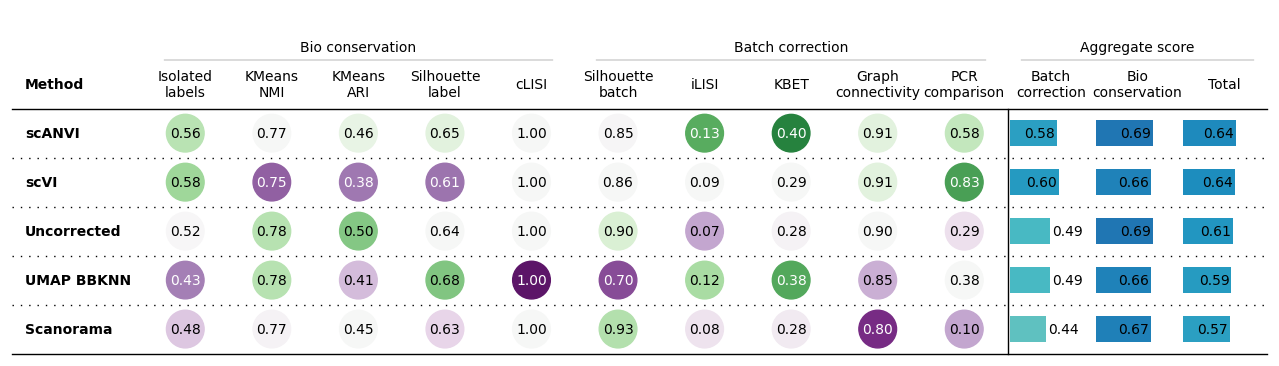

FileNotFoundError: [Errno 2] No such file or directory: 'figure2/scib_results.svg'

In [5]:
from scib_metrics.benchmark import Benchmarker

bm = Benchmarker(
    query,
    batch_key="donor_assay",
    label_key="cell_ontology_class",
    embedding_obsm_keys=["Uncorrected", "UMAP BBKNN", "Scanorama", "scANVI", "scVI"],
    n_jobs=6,
)
bm.benchmark()


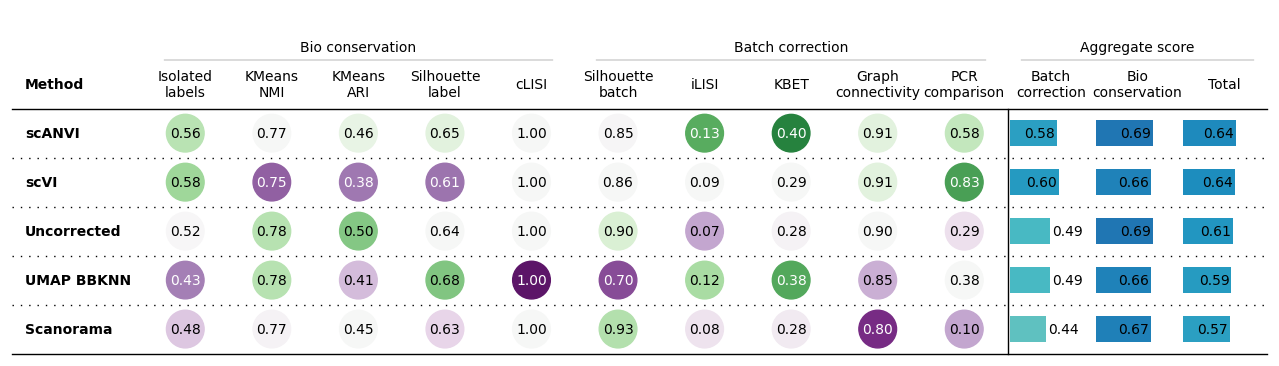

In [6]:
bm.plot_results_table(min_max_scale=False, save_dir='fig2')